## Analysis for the correlation between unemployment rate and infection rate in Denver, CO

This jupyter notebook contains all the code that have been used between A4 and A7 and has documented steps in detecting the correlation between unemployment rate and infection rate in Denver. The code starts by cleaning and plotting COVID-related data with metrics that are specifically defined. Then, unemployment data is added to the analysis and two statistical methods are used to identify if there is a correlation between the two rates. 

In [45]:
#import necessary libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
# read the first two datasets
confirmed_cases = pd.read_csv('RAW_us_confirmed_cases.csv')
mandates = pd.read_csv('CDC.csv')

In [47]:
# filter data to only keep the county assigned
confirmed_denver = confirmed_cases[(confirmed_cases['Province_State'] == 'Colorado') & (confirmed_cases['Admin2'] == 'Denver')]
confirmed_denver.reset_index(drop=True, inplace=True)

In [48]:
confirmed_denver

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
0,Colorado,Denver,84008031,US,USA,840,8031.0,US,39.760183,-104.87257,...,90270,90270,90270,91062,91248,91545,91949,92210,92210,92210


In [49]:
# filter data to only keep the county assigned
mandates_denver = mandates[(mandates['State_Tribe_Territory'] == 'CO') &(mandates['County_Name'] == 'Denver County')]
mandates_denver.reset_index(drop=True, inplace=True)

In [50]:
mandates_denver

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,CO,Denver County,8,31,5/21/2020,2,NaN,NaN,NaN,NaN
1,CO,Denver County,8,31,4/10/2020,2,NaN,NaN,NaN,NaN
2,CO,Denver County,8,31,4/11/2020,2,NaN,NaN,NaN,NaN
3,CO,Denver County,8,31,4/12/2020,2,NaN,NaN,NaN,NaN
4,CO,Denver County,8,31,4/13/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
488,CO,Denver County,8,31,8/11/2021,2,No,Official,https://doc-00-04-prod-01-apps-viewer.googleus...,"Colo. Order No. 20-38 (Amended 5) (July 30, 2021)"
489,CO,Denver County,8,31,8/12/2021,2,No,Official,https://doc-00-04-prod-01-apps-viewer.googleus...,"Colo. Order No. 20-38 (Amended 5) (July 30, 2021)"
490,CO,Denver County,8,31,8/13/2021,2,No,Official,https://doc-00-04-prod-01-apps-viewer.googleus...,"Colo. Order No. 20-38 (Amended 5) (July 30, 2021)"
491,CO,Denver County,8,31,8/14/2021,2,No,Official,https://doc-00-04-prod-01-apps-viewer.googleus...,"Colo. Order No. 20-38 (Amended 5) (July 30, 2021)"


In [51]:
# flip the confirmed data and reformat the dates
confirmed = confirmed_denver.iloc[:,21:-16].T.reset_index()
confirmed.rename(columns = {'index':'date',0:'number'}, inplace=True)
policy = mandates_denver[['date','Face_Masks_Required_in_Public']]
confirmed['date'] = pd.to_datetime(confirmed['date'])
policy['date'] = pd.to_datetime(policy['date'])

<ipython-input-51-5f0cd01f64e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy['date'] = pd.to_datetime(policy['date'])


In [52]:
confirmed

,date,number
0,2020-02-01,0
1,2020-02-02,0
2,2020-02-03,0
3,2020-02-04,0
4,2020-02-05,0
...,...,...
618,2021-10-11,87991
619,2021-10-12,88190
620,2021-10-13,88415
621,2021-10-14,88667


In [53]:
policy

,date,Face_Masks_Required_in_Public
0,2020-05-21,NaN
1,2020-04-10,NaN
2,2020-04-11,NaN
3,2020-04-12,NaN
4,2020-04-13,NaN
...,...,...
488,2021-08-11,No
489,2021-08-12,No
490,2021-08-13,No
491,2021-08-14,No


In [54]:
# calculate daily number of confirmed cases and daily infection rate according to the definition
data = confirmed.merge(policy, how='left', on='date')
data['difference'] = data['number'].diff().fillna(data['number'])
data['Population'] = 715522
data['DailyInfectionRate'] = (data['difference']*100.0)/(data['Population'] - data['number'])

Text(0.5, 1.0, 'Daily Infection Rate for Denver, CO from Feb. 1st 2020 to Oct. 15th 2021')

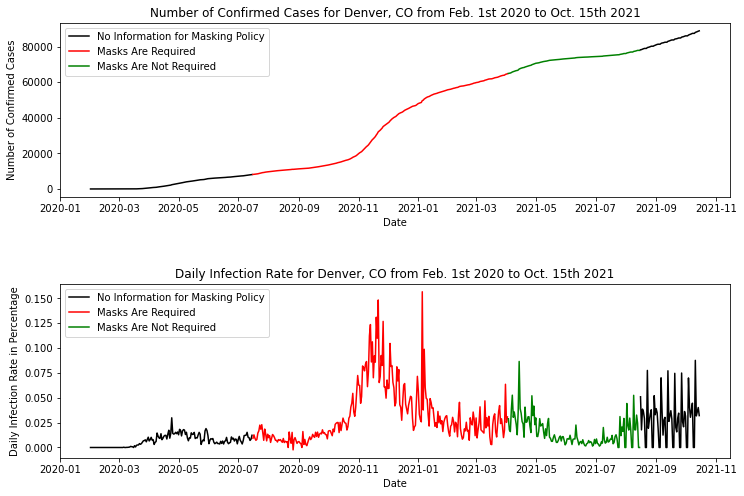

In [55]:
# drawing the original data without smoothing will lead to many spikes
# this is the graph submitted for A4, but after taking the advice of the TA
# a smoothing technique was applied to improve the visualization
fig, ax = plt.subplots(2,figsize=(12,8))
fig.subplots_adjust(hspace=.5)
ax[0].plot(data.iloc[:166,0], data.iloc[:166,1],label='No Information for Masking Policy',color='black')
ax[0].plot(data.iloc[166:427,0], data.iloc[166:427,1],label='Masks Are Required',color='red')
ax[0].plot(data.iloc[427:562,0], data.iloc[427:562,1],label='Masks Are Not Required',color='green')
ax[0].plot(data.iloc[562:,0], data.iloc[562:,1],color='black')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Confirmed Cases')
ax[0].legend()
ax[0].set_title('Number of Confirmed Cases for Denver, CO from Feb. 1st 2020 to Oct. 15th 2021')
ax[1].plot(data.iloc[:166,0], data.iloc[:166,5],label='No Information for Masking Policy',color='black')
ax[1].plot(data.iloc[166:427,0], data.iloc[166:427,5],label='Masks Are Required',color='red')
ax[1].plot(data.iloc[427:562,0], data.iloc[427:562,5],label='Masks Are Not Required',color='green')
ax[1].plot(data.iloc[562:,0], data.iloc[562:,5],color='black')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Infection Rate in Percentage')
ax[1].legend(loc='upper left')
ax[1].set_title('Daily Infection Rate for Denver, CO from Feb. 1st 2020 to Oct. 15th 2021')

In [56]:
# the above code leads to too many spikes in the visualization
# smoothing the data by using 7 day rolling average
data['number_rolling'] = data.number.rolling(window=7).mean().round().fillna(data['number'])
data['difference_rolling'] = data['number_rolling'].diff().fillna(data['number_rolling'])
data['DailyInfectionRate_rolling'] = (data['difference_rolling']*100.0)/(data['Population'] - data['number_rolling'])

In [57]:
data

,date,number,Face_Masks_Required_in_Public,difference,Population,DailyInfectionRate,number_rolling,difference_rolling,DailyInfectionRate_rolling
0,2020-02-01,0,NaN,0.0,715522,0.000000,0.0,0.0,0.000000
1,2020-02-02,0,NaN,0.0,715522,0.000000,0.0,0.0,0.000000
2,2020-02-03,0,NaN,0.0,715522,0.000000,0.0,0.0,0.000000
3,2020-02-04,0,NaN,0.0,715522,0.000000,0.0,0.0,0.000000
4,2020-02-05,0,NaN,0.0,715522,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
618,2021-10-11,87991,NaN,550.0,715522,0.087645,87306.0,217.0,0.034542
619,2021-10-12,88190,NaN,199.0,715522,0.031722,87513.0,207.0,0.032961
620,2021-10-13,88415,NaN,225.0,715522,0.035879,87726.0,213.0,0.033928
621,2021-10-14,88667,NaN,252.0,715522,0.040201,87941.0,215.0,0.034259


Text(0.5, 1.0, 'Daily Infection Rate in Denver, CO')

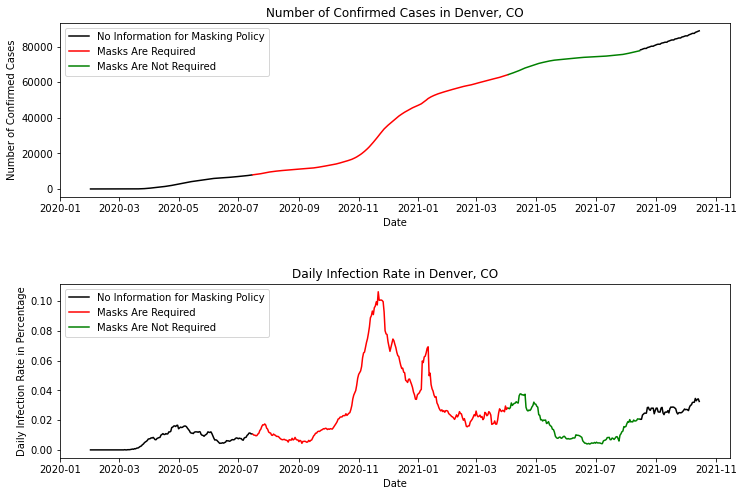

In [58]:
# draw the daily number of confirmed cases and daily infection rate
# Use colors to encode masking requirement
fig, ax = plt.subplots(2,figsize=(12,8))
fig.subplots_adjust(hspace=.5)
ax[0].plot(data.iloc[:166,0], data.iloc[:166,6],label='No Information for Masking Policy',color='black')
ax[0].plot(data.iloc[166:427,0], data.iloc[166:427,6],label='Masks Are Required',color='red')
ax[0].plot(data.iloc[427:562,0], data.iloc[427:562,6],label='Masks Are Not Required',color='green')
ax[0].plot(data.iloc[562:,0], data.iloc[562:,1],color='black')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Confirmed Cases')
ax[0].legend()
ax[0].set_title('Number of Confirmed Cases in Denver, CO')
ax[1].plot(data.iloc[:166,0], data.iloc[:166,8],label='No Information for Masking Policy',color='black')
ax[1].plot(data.iloc[166:427,0], data.iloc[166:427,8],label='Masks Are Required',color='red')
ax[1].plot(data.iloc[427:562,0], data.iloc[427:562,8],label='Masks Are Not Required',color='green')
ax[1].plot(data.iloc[562:,0], data.iloc[562:,8],color='black')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Infection Rate in Percentage')
ax[1].legend(loc='upper left')
ax[1].set_title('Daily Infection Rate in Denver, CO')
#plt.savefig('Graph#1.jpeg')

Text(0.5, 1.0, 'Unemployment Rate in Denver, CO')

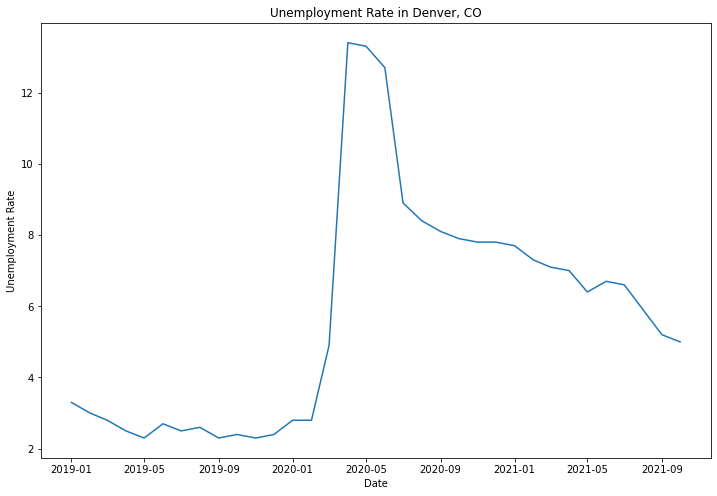

In [59]:
unemployment = pd.read_csv('unemployment_rate_in_Denver.csv')
unemployment['date'] = pd.to_datetime(unemployment['Label'], dayfirst=True)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(unemployment['date'], unemployment['Value'],label='Unemployment Rate')
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate in Denver, CO')
#plt.savefig('Graph#2.jpeg')

In [60]:
# adjust the range of dates to look at for unemployment rate so that it is the same as infection rate
x = unemployment[unemployment['date'] >= '2020-02-01'][['date','Value']].reset_index(drop=True)
y = data[['date','DailyInfectionRate_rolling']]

In [61]:
# adjust monthly unemployment rate to daily to make the two arrays have same length for the statistical test
res = pd.merge(x.assign(grouper=x['date'].dt.to_period('M')),
               y.assign(grouper=y['date'].dt.to_period('M')),
               how = 'right', on='grouper')

In [62]:
res

,date_x,Value,grouper,date_y,DailyInfectionRate_rolling
0,2020-02-01,2.8,2020-02,2020-02-01,0.000000
1,2020-02-01,2.8,2020-02,2020-02-02,0.000000
2,2020-02-01,2.8,2020-02,2020-02-03,0.000000
3,2020-02-01,2.8,2020-02,2020-02-04,0.000000
4,2020-02-01,2.8,2020-02,2020-02-05,0.000000
...,...,...,...,...,...
618,2021-10-01,5.0,2021-10,2021-10-11,0.034542
619,2021-10-01,5.0,2021-10,2021-10-12,0.032961
620,2021-10-01,5.0,2021-10,2021-10-13,0.033928
621,2021-10-01,5.0,2021-10,2021-10-14,0.034259


In [63]:
# calculate Pearson r with a p-value
stats.pearsonr(res['Value'], y['DailyInfectionRate_rolling'])

(-0.03543073894861319, 0.37731662022282386)

Text(0.5, 1.0, 'Unemployment Rate in Denver, CO')

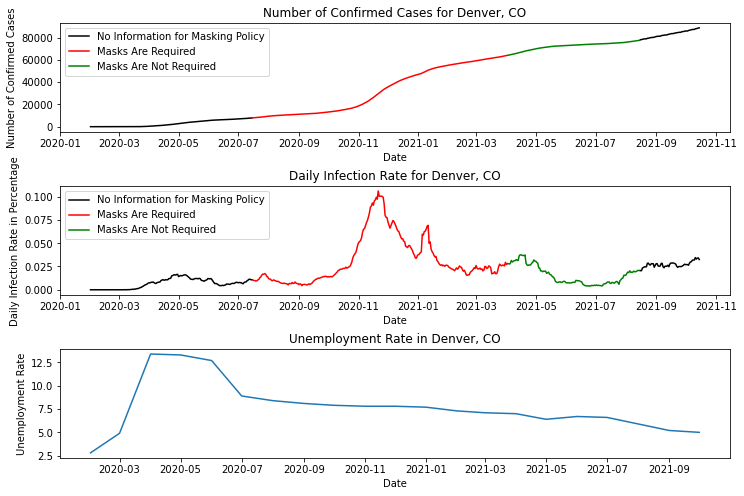

In [64]:
# put all three graphs together for better comparison
fig, ax = plt.subplots(3,figsize=(12,8))
fig.subplots_adjust(hspace=.5)
ax[0].plot(data.iloc[:166,0], data.iloc[:166,6],label='No Information for Masking Policy',color='black')
ax[0].plot(data.iloc[166:427,0], data.iloc[166:427,6],label='Masks Are Required',color='red')
ax[0].plot(data.iloc[427:562,0], data.iloc[427:562,6],label='Masks Are Not Required',color='green')
ax[0].plot(data.iloc[562:,0], data.iloc[562:,1],color='black')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Confirmed Cases')
ax[0].legend()
ax[0].set_title('Number of Confirmed Cases for Denver, CO')
ax[1].plot(data.iloc[:166,0], data.iloc[:166,8],label='No Information for Masking Policy',color='black')
ax[1].plot(data.iloc[166:427,0], data.iloc[166:427,8],label='Masks Are Required',color='red')
ax[1].plot(data.iloc[427:562,0], data.iloc[427:562,8],label='Masks Are Not Required',color='green')
ax[1].plot(data.iloc[562:,0], data.iloc[562:,8],color='black')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Infection Rate in Percentage')
ax[1].legend(loc='upper left')
ax[1].set_title('Daily Infection Rate for Denver, CO')
ax[2].plot(x['date'], x['Value'],label='Unemployment Rate')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Unemployment Rate')
ax[2].set_title('Unemployment Rate in Denver, CO')
#plt.savefig('Graph#3.jpeg')

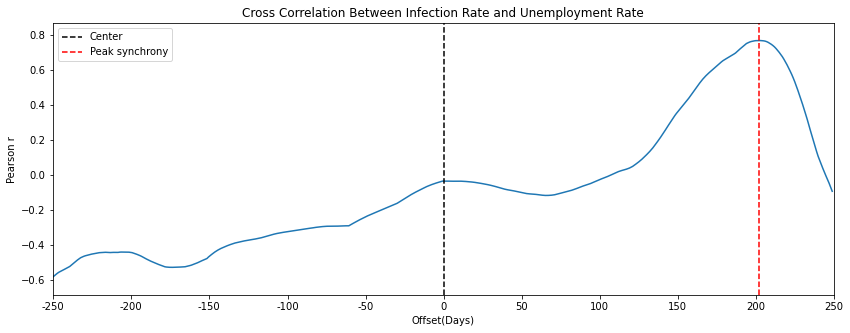

In [65]:
# calculate time-lagged cross correlation
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = res['DailyInfectionRate_rolling']
d2 = res['Value']
seconds = 5
fps = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.argmax(rs)-np.floor(len(rs)/2)
f,ax=plt.subplots(figsize=(14,5))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title= 'Cross Correlation Between Infection Rate and Unemployment Rate',\
       ylim=[np.min(rs) - 0.1, np.max(rs) + 0.1],xlim=[0,501], xlabel='Offset(Days)',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301, 351, 401, 451, 501])
ax.set_xticklabels([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
plt.legend()
# plt.savefig('Graph#4.jpeg')

In [66]:
# find the exact offset time for the strongest correlation (peark synchrony)
offset

203.0

In [67]:
# see the exact Pearson r for the strongest correlation
d1.corr(d2.shift(203))

0.7669145593147392